# DSCI 100 Project - Group 12
Authors:  

Tia Murdoch 719191378

Sam Wang 70602008

Hanna Ross 40955320

Maan Grover 62953260

# Introduction

Raisins are dried grapes and they are eaten all over the world. The small dehydrated fruit can be eaten on its own or is often used in cooking and baking. Raisins will obtain their primary differences from the type of grape used to produce them, as well as the drying method.

Our dataset considers two types of raisins that are popular in Turkey, Besni and Kecimen.
Besni raisins are produced from the Sultana grape, and are characterized by their small, oval shape and light brown color.
The Kecimen raisins are made from Black Corinth grapes. They are dark brown, round, and smooth. They are also generally smaller than Besni raisins.

We will be using this dataset to determine how various size measurements can predict the classification of raisins to these two species.

# Methods & Results
This study use k-nn classification method to classify type of raisin.

Since we changed our dataset after proposal submission, we will do a more detailed preliminary exploratory data analysis first.
Then we determin the variables that has the strongest relationships of determine diffrent type of raisin, set them as the predictors.

Steps of k-nn Classification model building (exploratory data analysis):

1. Create Recipe

2. Cross-Validate the data

3. Workflow and Fit

4. Use our classifier to predict the testing data

5. Evaluate the accuracy of our model

6. Create visualizasions that compare true model and trained model

## Load Data

In [2]:
#load library
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(GGally)
library(digest)
library(cowplot)
library(gridExtra)
#set seed
set.seed(123)

ERROR: Error in library(gridGraphics): there is no package called ‘gridGraphics’


In [3]:
#read data set
raisin <- read_csv("https://raw.githubusercontent.com/tmurdoch1/DSCI100-project/main/Raisin_Dataset.csv")
#print data
glimpse(raisin)

Rows: 900 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Class
dbl (7): Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 900
Columns: 8
$ Area            <dbl> 87524, 75166, 90856, 45928, 79408, 49242, 42492, 60952…
$ MajorAxisLength <dbl> 442.2460, 406.6907, 442.2670, 286.5406, 352.1908, 318.…
$ MinorAxisLength <dbl> 253.2912, 243.0324, 266.3283, 208.7600, 290.8275, 200.…
$ Eccentricity    <dbl> 0.8197384, 0.8018052, 0.7983536, 0.6849892, 0.5640113,…
$ ConvexArea      <dbl> 90546, 78789, 93717, 47336, 81463, 51368, 43904, 62329…
$ Extent          <dbl> 0.7586506, 0.6841296, 0.6376128, 0.6995994, 0.7927719,…
$ Perimeter       <dbl> 1184.040, 1121.786, 1208.575, 844.162, 1073.251, 881.8…
$ Class           <chr> "Kecimen", "Kecimen", "Kecimen", "Kecimen", "Kecimen",…


## Wrangle and Clean the data

Note column names are human readable already.

However the `Class` column is in chr formate, we change it into factor.

In [4]:
raisin <- mutate(raisin, Class = as_factor(Class))

Now the data is clean, we split data into training and testing data with 75% being training data.

In [5]:
raisin_split <- initial_split(raisin, prop = .75, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [6]:
#print the clean data
head(raisin, n=5)

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen


## Summarize the data
To give an overview of the training data:
1) summarize the mean value for each predictors
2) count the number of observation for each class
3) find out number of missing row
4) check our data is balanced


In [7]:
# 1&2)summarize mean and number of observation in a table
raisin_summarize <- raisin_train |>
    group_by(Class) |>
    summarize(Area_mean = mean(Area), MajorAxisLength_mean = mean(MajorAxisLength), MinorAxisLength_mean = mean(MinorAxisLength),
              Eccentricity_mean = mean(Eccentricity), ConvexArea_mean = mean(ConvexArea), Extent_mean = mean(Extent), 
                  Perimeter_mean = mean(Perimeter), observations = n())
raisin_summarize

Class,Area_mean,MajorAxisLength_mean,MinorAxisLength_mean,Eccentricity_mean,ConvexArea_mean,Extent_mean,Perimeter_mean,observations
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Kecimen,63994.55,355.2678,230.0726,0.7435603,66255.53,0.7071761,988.8967,337
Besni,110053.10,503.0439,277.7713,0.8196521,114424.92,0.6909313,1335.9067,337


In [8]:
# 3)find out number of missing row
sum(is.na(raisin_train))

[1] 0

There is no `na.` value in the data frame, which indicates there are not any missing rows.

In [11]:
# 4)check the proportion of classes in both whole data set and training data set
whole_raisin_proportions <- raisin |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(raisin))
whole_raisin_proportions

train_raisin_proportions <- raisin_train |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(raisin_train))
train_raisin_proportions

Class,n,percent
<fct>,<int>,<dbl>
Kecimen,450,50
Besni,450,50


Class,n,percent
<fct>,<int>,<dbl>
Kecimen,337,50
Besni,337,50


## Visualize the Data
Now we find suitable predictors in our data by visualization.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



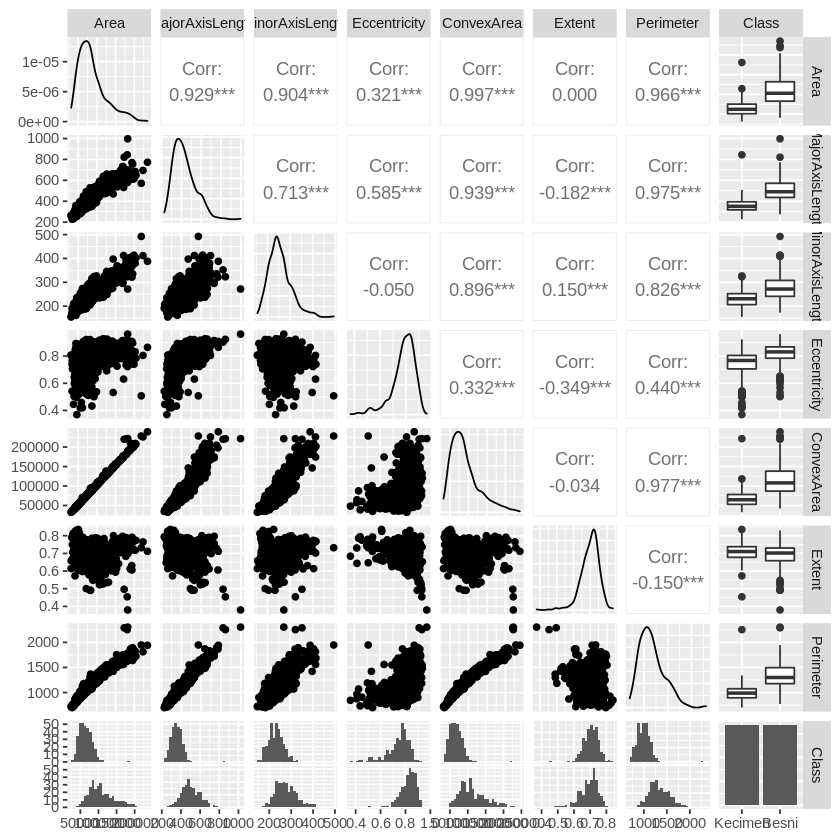

In [12]:
#Use ggpairs function to look at relationship between different variables. 
ggpairs(raisin_train)
options(repr.plot.width = 12, repr.plot.height = 12)

Based on the above plots, 4 variables were selected as having a high correlation with the type of raisin:
- Area
- Majour Axis Length
- Convex area 
- Perimeter

Those variables were then plotted against each other. 

In [14]:
plot_1 <- raisin_train |>
    ggplot(aes(x = Area, y = MajorAxisLength, color = Class)) +
    geom_point() +
    labs(x = "Area", y = "Major Axis Length", color = "Class", title = , subtitle = )

plot_2 <- raisin_train |>
    ggplot(aes(x = Area, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Area", y = "Perimeter", color = "Class")

plot_3 <- raisin_train |>
    ggplot(aes(x = Area, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Perimeter", y = "Convex Area", color = "Class")

plot_4 <- raisin_train |>
    ggplot(aes(x = MajorAxisLength, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Convex Area", color = "Class")

plot_5 <- raisin_train |>
    ggplot(aes(x = MajorAxisLength, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Major Axis Length", y = "Perimeter", color = "Class")

plot_6 <- raisin_train |>
    ggplot(aes(x = ConvexArea, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Convex Area", y = "Perimeter", color = "Class")

Plot to show they are strong variables to distinguish type of raisin (Kecimen & Besni)

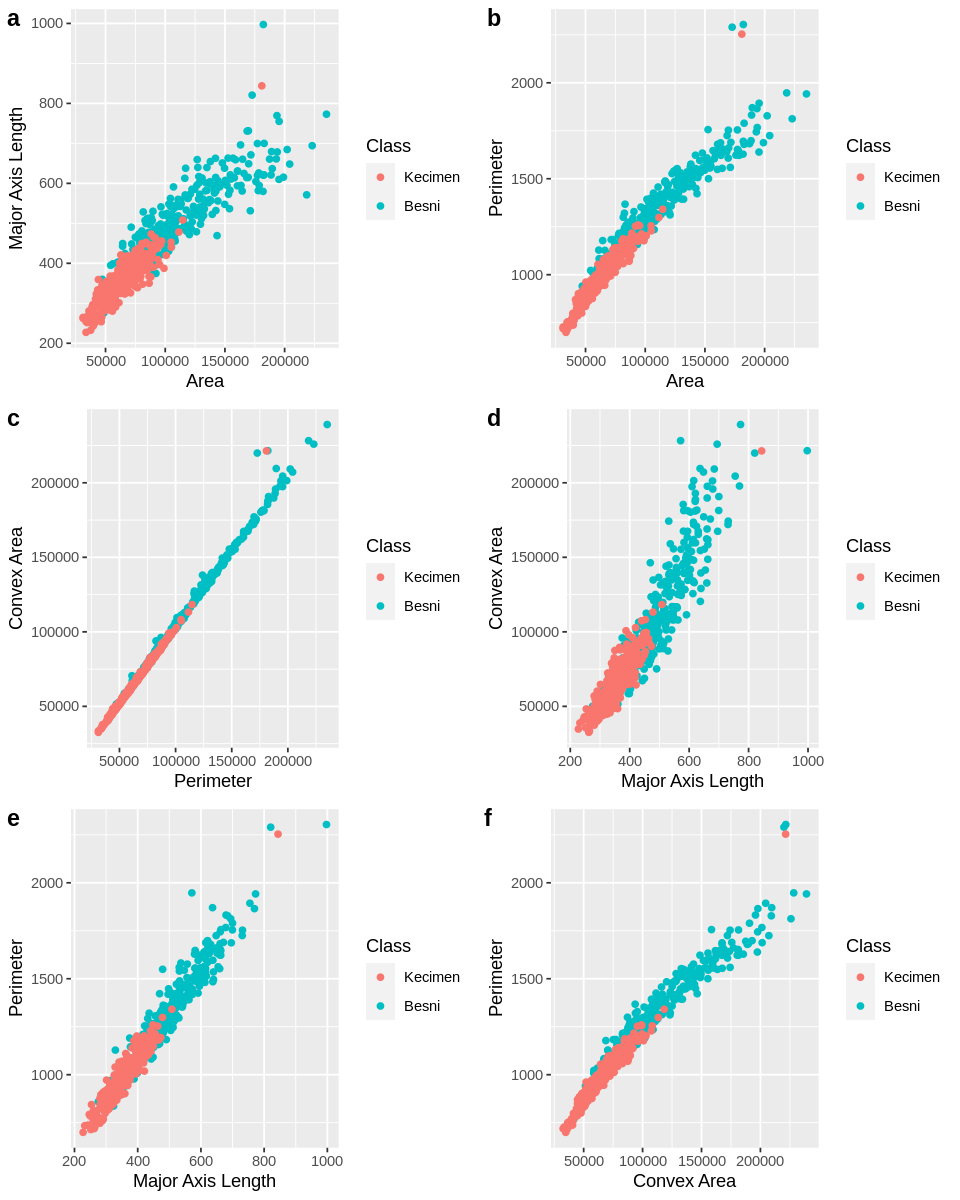

In [50]:
plot_grid(plot_1, plot_2, plot_3, plot_4,
          plot_5, plot_6,
          labels=c('a', 'b', 'c', 'd', 'e', 'f'), ncol = 2)
options(repr.plot.width = 8, repr.plot.height = 10)

Figure 1: Relationship between physical characteristics of two classes of raisins, Kecimen and Besni. (a) Area vs. majour axis length, (b) area vs. perimeter, (c) perimeter vs. convex area, (d) majour axis length vs. convex area, (e) majour axis length vs. perimeter and (f) convex area vs. perimeter. All plots display a strong, positive, linear relationship. 

From the above plots, it is evident that there is a linear positive relationship between all pairings of the selected variables. As area increases, so does convex area, perimeter, and majour axis length, as would be expected based on these types of measurements. Furthermore, besni raisins appear to be generally larger than kecimen raisins in all chosen characteristics, indicating that there is a consistent relationship between the raisons through all pairings. There is greater variation in the values of Besni raisons compared to kecimen raisons and there is a single outlier of the kecimen raison. This outlier would likely be classified as Besni raison by a classification algorithm. 

# Create k-nn Classification model

In [52]:
raisin_proportions <- raisin_train |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(raisin_train))
proportion_grid <- plot_grid(whole_raisin_proportions, raisin_proportions, labels=c('a', 'B'))


Warning message in as_grob.default(plot):
“Cannot convert object of class tbl_dftbldata.frame into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class tbl_dftbldata.frame into a grob.”


Per the above tables, the proportions of each class are balanced in both the whole data set and training data set. This simplifies our classification process to some extent due to the fact that we do not have a dominating class. When one class is overrepresented, new observations are more likely to be deemed to be of the overrepresented class. Altering the classifier to solve this problem is very complex, but if it were necessary, the step_usample can be used to multiply the underrepresented class, thus balancing the classifier and improving accuracy. 

### 1. Create recipe

In [23]:
raisin_recipe <- recipe(Class ~ Area + MajorAxisLength + Perimeter + ConvexArea, data = raisin_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
raisin_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### 2. Tuning Classifier by cross-validation

In [24]:
#cross-validation
raisin_vfold <- vfold_cv(raisin_train, v = 5, strata = Class)

In [25]:
#create model
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [26]:
#tune grid
k_vals <- tibble(neighbors = seq(from = 20, to = 40, by = 2))

knn_results <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = raisin_vfold, grid = k_vals) |>
  collect_metrics() 
#find accuracy
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
20,accuracy,binary,0.8457419,5,0.007333637,Preprocessor1_Model01
22,accuracy,binary,0.8487050,5,0.005759866,Preprocessor1_Model02
24,accuracy,binary,0.8531168,5,0.005884400,Preprocessor1_Model03
26,accuracy,binary,0.8516462,5,0.006955676,Preprocessor1_Model04
28,accuracy,binary,0.8501756,5,0.008152421,Preprocessor1_Model05
30,accuracy,binary,0.8501756,5,0.009092947,Preprocessor1_Model06
32,accuracy,binary,0.8472125,5,0.006254948,Preprocessor1_Model07
34,accuracy,binary,0.8531387,5,0.007020480,Preprocessor1_Model08
36,accuracy,binary,0.8486831,5,0.006745316,Preprocessor1_Model09


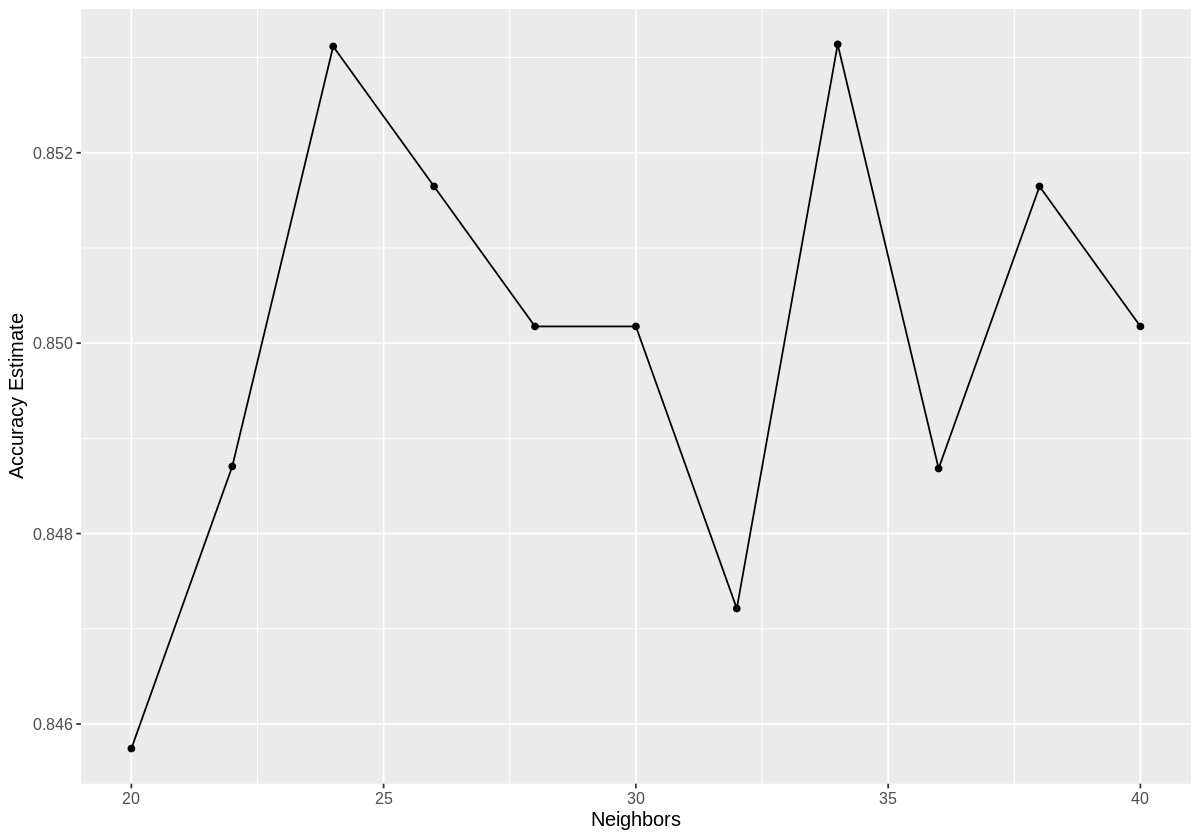

In [27]:
#plot to find best k
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
options(repr.plot.width = 10, repr.plot.height = 7)
accuracy_vs_k

We choose k = 25 because

### 3. Create model with best k

In [28]:
#create model with best k
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
  set_engine("kknn") |>
  set_mode("classification")

#fit training data
knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit(data = raisin_train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(25,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.152819
Best kernel: rectangular
Best k: 25

### 4. Predict and check accuracy

In [29]:
raisin_predictions <- predict(knn_fit, raisin_test) |>
  bind_cols(raisin_test)
glimpse(raisin_predictions)

Rows: 226
Columns: 9
$ .pred_class     <fct> Besni, Besni, Kecimen, Kecimen, Kecimen, Kecimen, Keci…
$ Area            <dbl> 87524, 90856, 79408, 43441, 33565, 57346, 75620, 73167…
$ MajorAxisLength <dbl> 442.2460, 442.2670, 352.1908, 276.6108, 261.5543, 330.…
$ MinorAxisLength <dbl> 253.2912, 266.3283, 290.8275, 201.8131, 167.7085, 222.…
$ Eccentricity    <dbl> 0.8197384, 0.7983536, 0.5640113, 0.6838823, 0.7673743,…
$ ConvexArea      <dbl> 90546, 93717, 81463, 45133, 35794, 59365, 77493, 74545…
$ Extent          <dbl> 0.7586506, 0.6376128, 0.7927719, 0.6908556, 0.6815505,…
$ Perimeter       <dbl> 1184.040, 1208.575, 1073.251, 803.748, 751.413, 928.27…
$ Class           <fct> Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, Kecimen, …


In [30]:
#check accuracy
raisin_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.880531


In [31]:
confusion_mat <- raisin_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion_mat

          Truth
Prediction Kecimen Besni
   Kecimen     103    17
   Besni        10    96

We see the accuracy of the model is about 88.05%, which is good.
By looking at the confusion matrix, we have a closer look of our predictions. We see the correct prediction of Kecimen is 103 and 96 for Besni, according accuracy is 91.15% for Kecimen while 84.96% for Besni, thus we can conclude our model did a better prediction on Kecimen.

### 5. Visualizations of the analysis

In [32]:
plot2.1 <- raisin_test |>
    ggplot(aes(x = Area, y= MajorAxisLength, color = Class))+
    geom_point(alpha = 0.6)+
    labs(x = "Area" , y = "Major Axis Length", color = "Class",
        subtitle="True Area vs. Major Axis Length")+
  theme(text = element_text(size = 12))

plot2.2 <- raisin_predictions |>
    ggplot(aes(x = Area, y= MajorAxisLength, color = .pred_class))+
    geom_point(alpha = 0.6)+
    labs(x = "Area" , y = "Major Axis Length", color = "Predicted Class",
        subtitle="Model Predicted Area vs. Major Axis Length")+
  theme(text = element_text(size = 12))


In [33]:
plot2.3 <- raisin_test |>
    ggplot(aes(x = Area, y= ConvexArea, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 7")+
    labs(x = "Area" , y = "Major Axis Length", color = "Class",
        subtitle="True Area vs. Convex Area")+
  theme(text = element_text(size = 12))

plot2.4 <- raisin_predictions |>
    ggplot(aes(x = Area, y= ConvexArea, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 7")+
    labs(x = "Area" , y = "Major Axis Length", color = "Predicted Class",
        subtitle="Model Predicted Area vs. Convex Area")+
  theme(text = element_text(size = 12))


In [34]:
plot2.5 <- raisin_test |>
    ggplot(aes(x = Area, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 8")+
    labs(x = "Area" , y = "Perimeter", color = "Class",
        subtitle="True Area vs. Perimeter")+
  theme(text = element_text(size = 12))

plot2.6 <- raisin_predictions |>
    ggplot(aes(x = Area, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 8")+
    labs(x = "Area" , y = "Perimeter", color = "Predicted Class",
        subtitle="Model Predicted Area vs. Perimeter")+
    theme(text = element_text(size = 12))


In [35]:
plot2.7 <- raisin_test |>
    ggplot(aes(x = MajorAxisLength, y= ConvexArea, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Convex Area", color = "Class",
        subtitle = "True Major Axis Length vs. Convex Area")+
      theme(text = element_text(size = 12))

plot2.8 <- raisin_predictions |>
    ggplot(aes(x = MajorAxisLength, y= ConvexArea, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Convex area", color = "Predicted Class",
        subtitle = "Model Predicted Major Axis Length vs. Convex Area")+
      theme(text = element_text(size = 12))

In [36]:
plot2.9 <- raisin_test |>
    ggplot(aes(x = MajorAxisLength, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Perimeter", color = "Class",
        subtitle = "True Major Axis Length vs. Perimeter")

plot2.10 <- raisin_predictions |>
    ggplot(aes(x = MajorAxisLength, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 9")+
    labs(x = "Major Axis Length" , y = "Perimeter", color = "Predicted Class",
        subtitle = "Model Predicted Major Axis Length vs. Perimeter")

In [37]:
plot2.11 <- raisin_test |>
    ggplot(aes(x = ConvexArea, y= Perimeter, color = Class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 10")+
    labs(x = "Convex Area" , y = "Perimeter", color = "Class",
        subtitle = "True Convex Area vs. Perimeter")

plot2.12 <- raisin_predictions |>
    ggplot(aes(x = ConvexArea, y= Perimeter, color = .pred_class))+
    geom_point(alpha = 0.6)+
    ggtitle("Figure 10")+
    labs(x = "Convex Area" , y = "Perimeter", color = "Predicted Class",
        subtitle = "Model Predicted Convex Area vs. Perimeter")

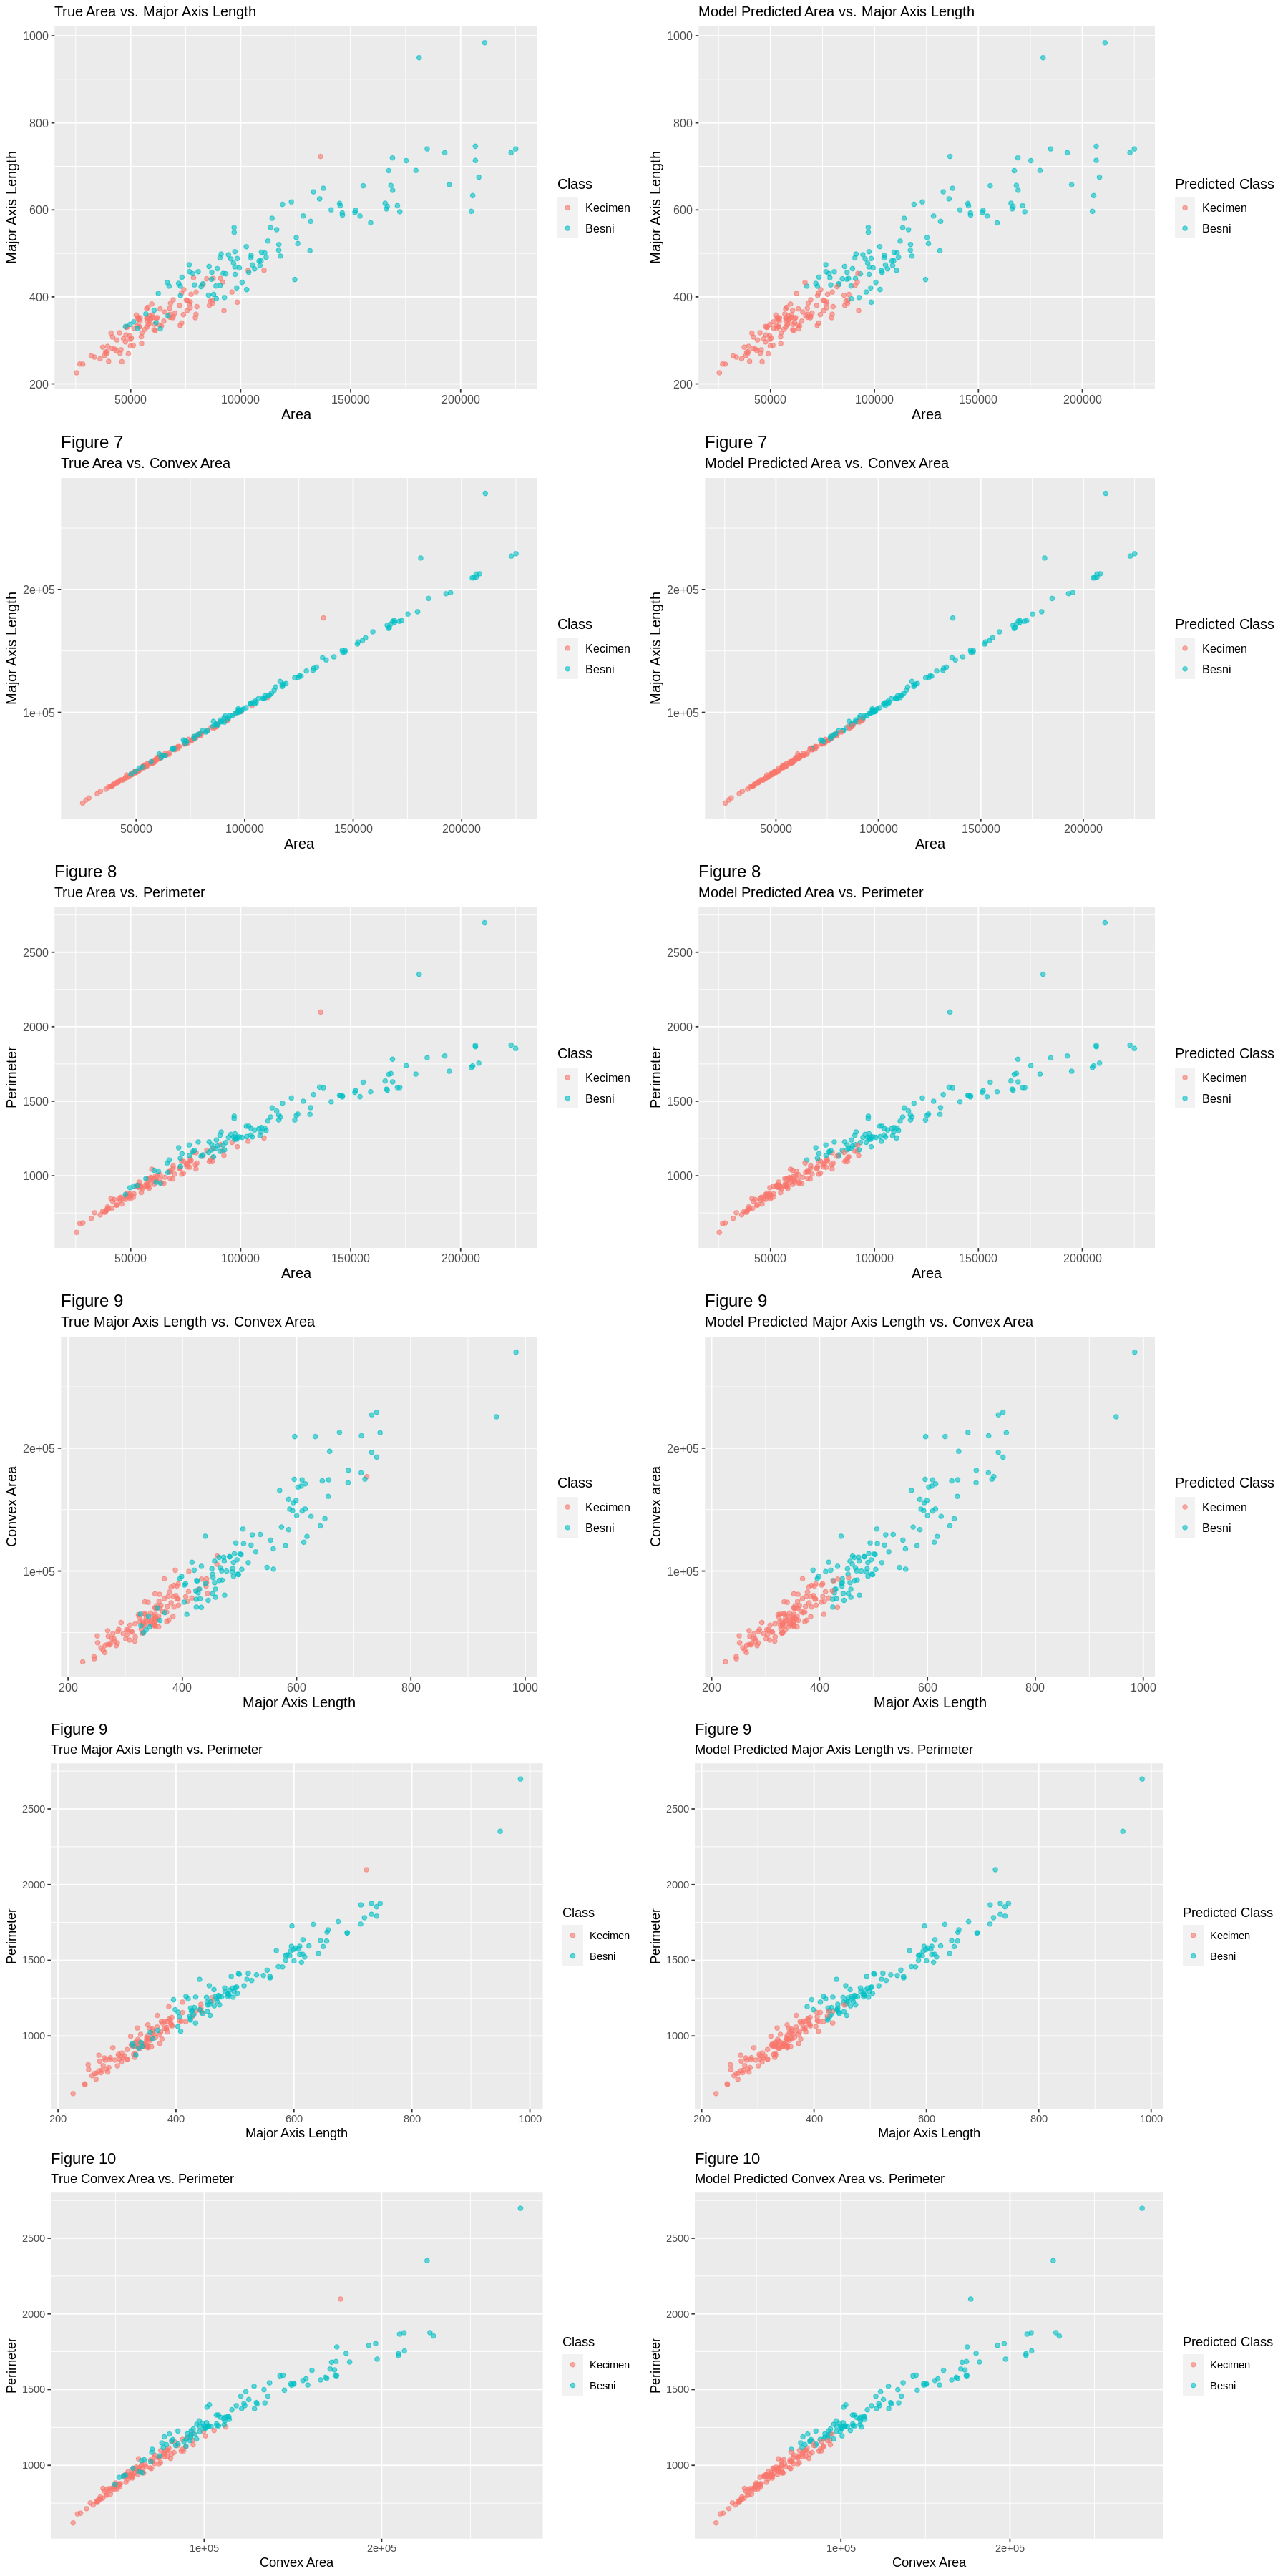

In [38]:
options(repr.plot.width = 15, repr.plot.height = 30)
plot_grid(plot2.1, plot2.2,
          plot2.3, plot2.4,
          plot2.5, plot2.6,
          plot2.7, plot2.8,
          plot2.9, plot2.10,
          plot2.11, plot2.12, ncol = 2)

From these plots, we can see our trained model looks very similar to original model. However, it did a poor job on outliers prediction, meaning the model identify ouliers of Kecimen as Besni while ouliers of Besni as Kecimen.

# Discussion